In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../dataset/Student_performance.csv')
print(f"Data loaded: {df.shape}")
print(f"\nNumerical columns: {df.select_dtypes(include=[np.number]).columns.tolist()}")

Data loaded: (6607, 20)

Numerical columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


In [4]:
# Get all numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Display correlations with Exam_Score (sorted)
exam_correlations = correlation_matrix['Exam_Score'].sort_values(ascending=False)
print("Correlations with Exam_Score (strongest to weakest):")
print(exam_correlations)

Correlations with Exam_Score (strongest to weakest):
Exam_Score           1.000000
Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
Name: Exam_Score, dtype: float64


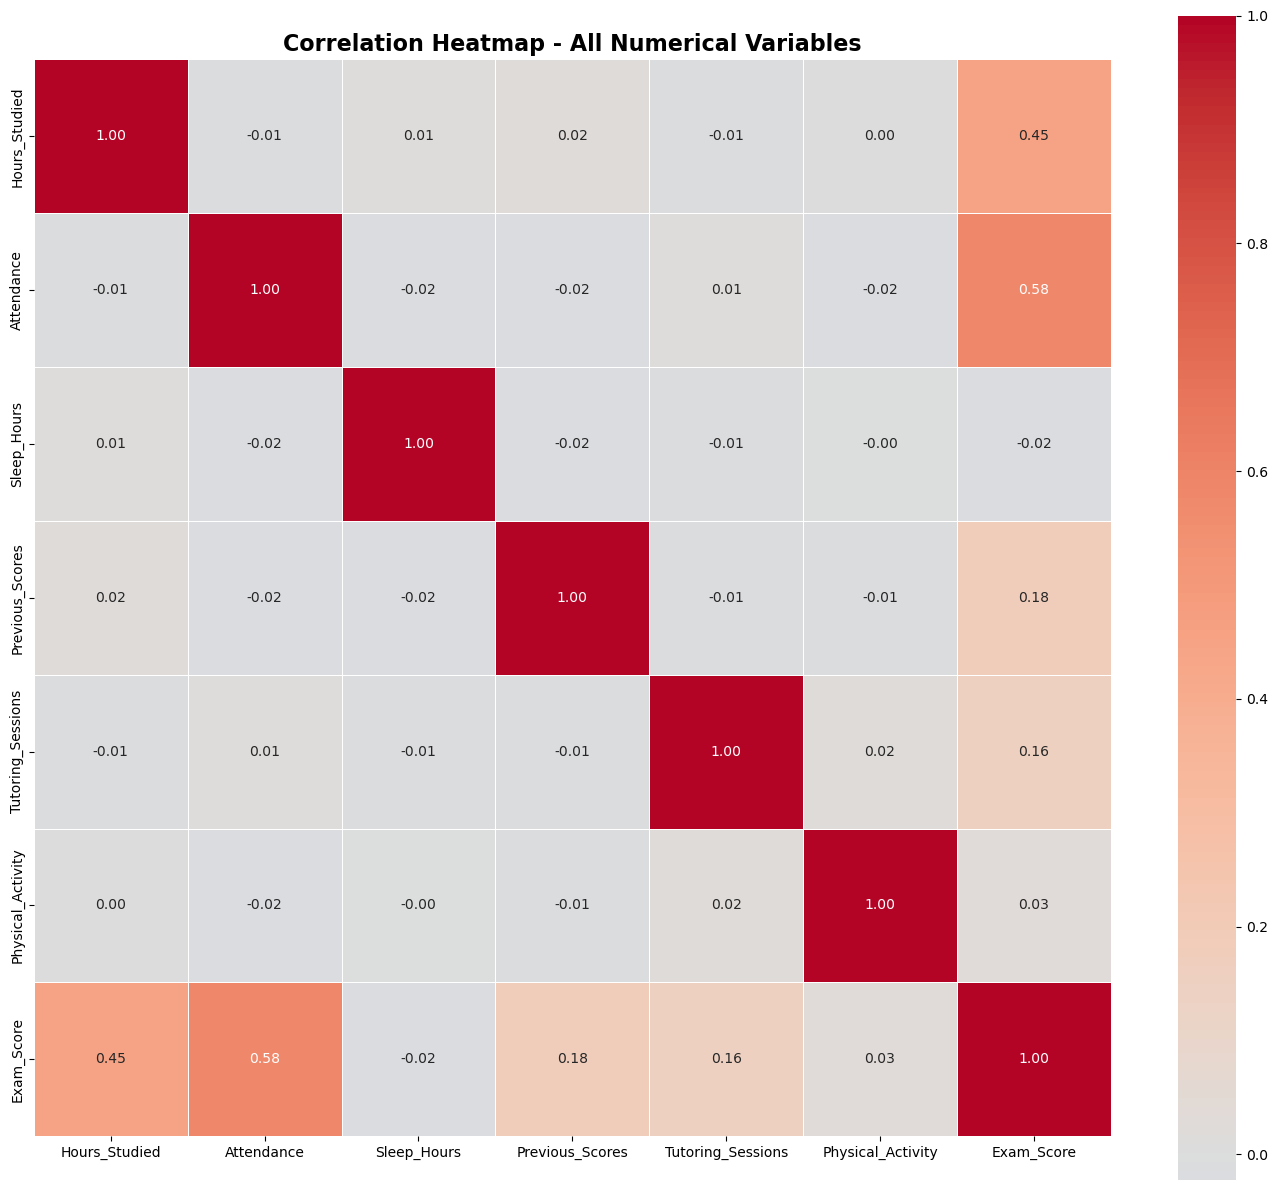

In [5]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, 
            annot=True,           # Show numbers in cells
            fmt='.2f',            # 2 decimal places
            cmap='coolwarm',      # Red = positive, Blue = negative
            center=0,             # White at 0
            square=True,
            linewidths=0.5)
plt.title('Correlation Heatmap - All Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

TOP 5 FACTORS AFFECTING EXAM SCORE:
Attendance: 0.581 (Strong)
Hours_Studied: 0.445 (Moderate)
Previous_Scores: 0.175 (Weak)
Tutoring_Sessions: 0.157 (Weak)
Physical_Activity: 0.028 (Weak)


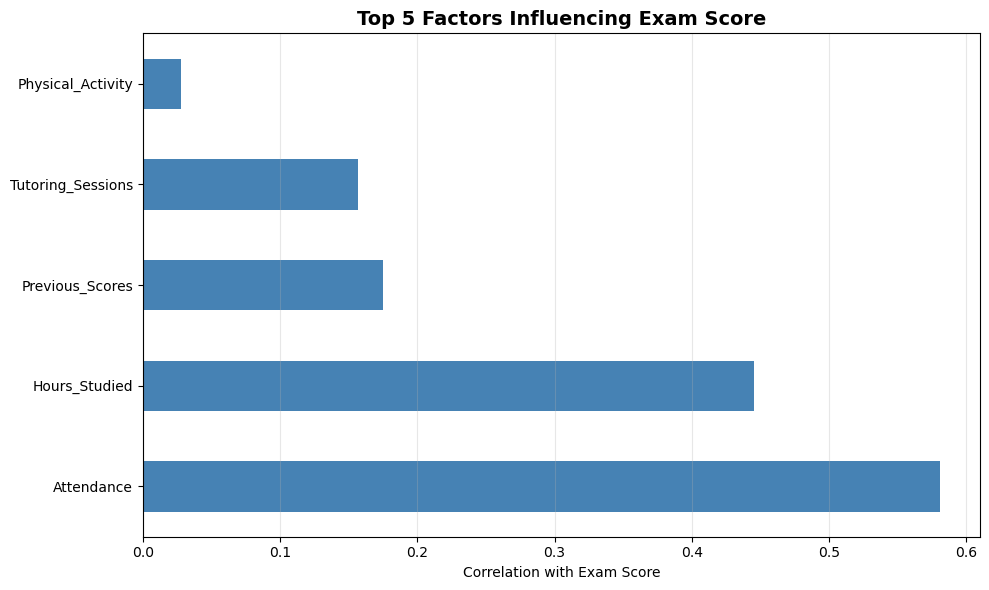

In [6]:
# Get top 5 (excluding Exam_Score itself)
top_factors = exam_correlations.drop('Exam_Score').head(5)

print("TOP 5 FACTORS AFFECTING EXAM SCORE:")
print("="*50)
for factor, corr in top_factors.items():
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    print(f"{factor}: {corr:.3f} ({strength})")

# Visualize top factors
plt.figure(figsize=(10, 6))
top_factors.plot(kind='barh', color='steelblue')
plt.xlabel('Correlation with Exam Score')
plt.title('Top 5 Factors Influencing Exam Score', fontweight='bold', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('top_5_factors.png', dpi=300)
plt.show()

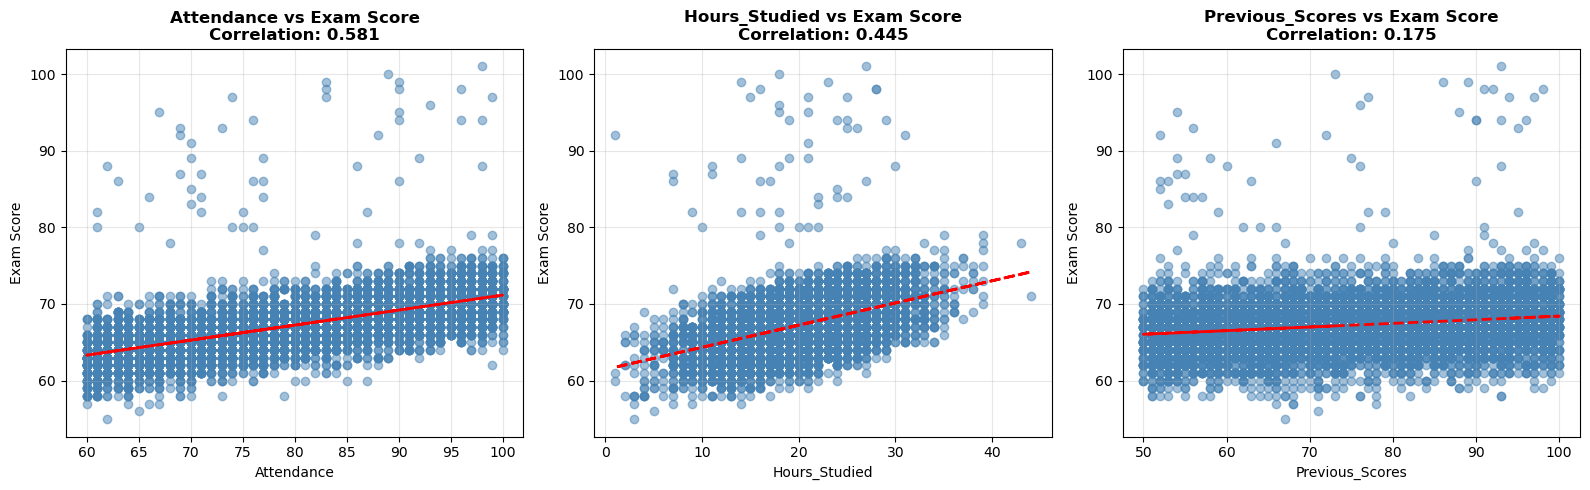

In [7]:
# Get top 3 factor names
top_3 = exam_correlations.drop('Exam_Score').head(3).index.tolist()

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, factor in enumerate(top_3):
    axes[i].scatter(df[factor], df['Exam_Score'], alpha=0.5, c='steelblue')
    
    # Add trend line
    z = np.polyfit(df[factor], df['Exam_Score'], 1)
    p = np.poly1d(z)
    axes[i].plot(df[factor], p(df[factor]), "r--", linewidth=2)
    
    corr = df[factor].corr(df['Exam_Score'])
    axes[i].set_xlabel(factor)
    axes[i].set_ylabel('Exam Score')
    axes[i].set_title(f'{factor} vs Exam Score\nCorrelation: {corr:.3f}', fontweight='bold')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('top_3_scatter.png', dpi=300)
plt.show()

Cross-correlations between top factors:
                   Attendance  Hours_Studied  Previous_Scores  \
Attendance               1.00          -0.01            -0.02   
Hours_Studied           -0.01           1.00             0.02   
Previous_Scores         -0.02           0.02             1.00   
Tutoring_Sessions        0.01          -0.01            -0.01   
Physical_Activity       -0.02           0.00            -0.01   

                   Tutoring_Sessions  Physical_Activity  
Attendance                      0.01              -0.02  
Hours_Studied                  -0.01               0.00  
Previous_Scores                -0.01              -0.01  
Tutoring_Sessions               1.00               0.02  
Physical_Activity               0.02               1.00  


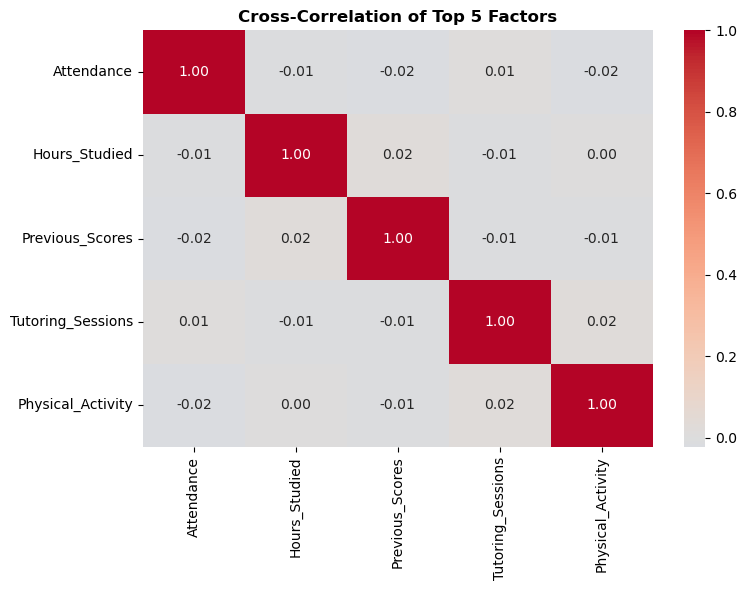

In [8]:
# Check if top factors are correlated with each other
print("Cross-correlations between top factors:")
print("="*50)

top_5_names = exam_correlations.drop('Exam_Score').head(5).index.tolist()
cross_corr = correlation_matrix.loc[top_5_names, top_5_names]
print(cross_corr.round(2))

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(cross_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Cross-Correlation of Top 5 Factors', fontweight='bold')
plt.tight_layout()
plt.savefig('cross_correlation.png', dpi=300)
plt.show()

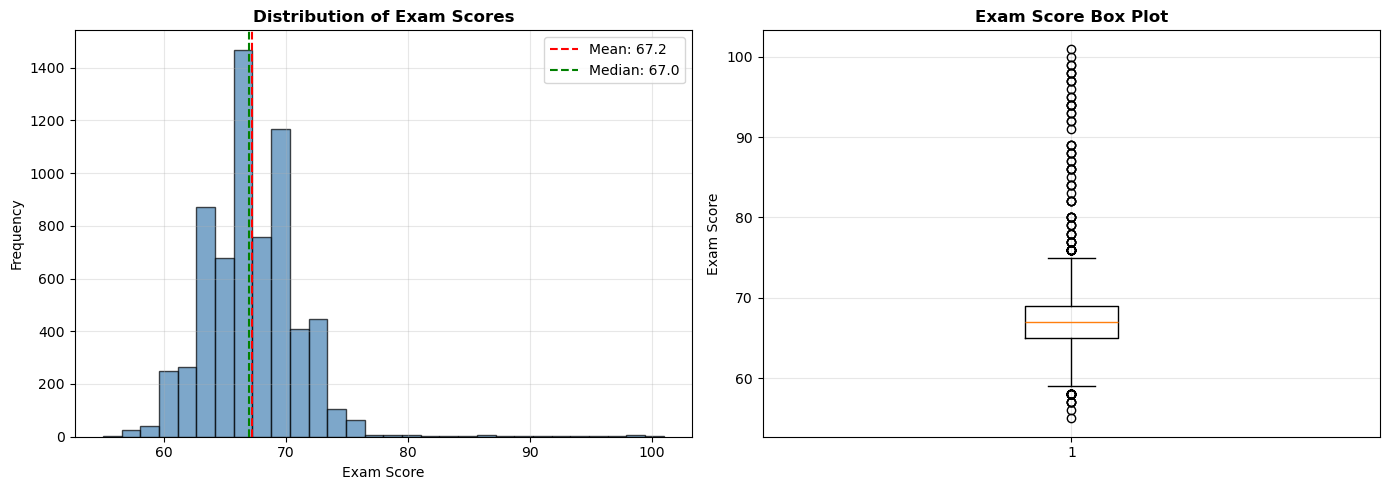

Mean: 67.24
Median: 67.00
Std Dev: 3.89
Min: 55
Max: 101


In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Exam_Score'], bins=30, edgecolor='black', color='steelblue', alpha=0.7)
axes[0].axvline(df['Exam_Score'].mean(), color='red', linestyle='--', label=f'Mean: {df["Exam_Score"].mean():.1f}')
axes[0].axvline(df['Exam_Score'].median(), color='green', linestyle='--', label=f'Median: {df["Exam_Score"].median():.1f}')
axes[0].set_xlabel('Exam Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Exam Scores', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['Exam_Score'], vert=True)
axes[1].set_ylabel('Exam Score')
axes[1].set_title('Exam Score Box Plot', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('score_distribution.png', dpi=300)
plt.show()

# Stats
print(f"Mean: {df['Exam_Score'].mean():.2f}")
print(f"Median: {df['Exam_Score'].median():.2f}")
print(f"Std Dev: {df['Exam_Score'].std():.2f}")
print(f"Min: {df['Exam_Score'].min()}")
print(f"Max: {df['Exam_Score'].max()}")

In [10]:
# Define high and low performers
high_threshold = df['Exam_Score'].quantile(0.75)  # Top 25%
low_threshold = df['Exam_Score'].quantile(0.25)   # Bottom 25%

high_performers = df[df['Exam_Score'] >= high_threshold]
low_performers = df[df['Exam_Score'] <= low_threshold]

print(f"High performers (score >= {high_threshold}): {len(high_performers)} students")
print(f"Low performers (score <= {low_threshold}): {len(low_performers)} students")

# Compare key metrics
comparison_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                   'Motivation_Level', 'Tutoring_Sessions']

# Only use numerical columns that exist
numerical_comparison = [col for col in comparison_cols if col in df.select_dtypes(include=[np.number]).columns]

comparison = pd.DataFrame({
    'High Performers': high_performers[numerical_comparison].mean(),
    'Low Performers': low_performers[numerical_comparison].mean(),
    'Difference': high_performers[numerical_comparison].mean() - low_performers[numerical_comparison].mean()
}).round(2)

print("\nComparison of High vs Low Performers:")
print(comparison)

High performers (score >= 69.0): 2249 students
Low performers (score <= 65.0): 2131 students

Comparison of High vs Low Performers:
                   High Performers  Low Performers  Difference
Hours_Studied                23.10           16.73        6.37
Attendance                   88.92           70.77       18.15
Sleep_Hours                   7.02            7.04       -0.02
Previous_Scores              78.17           71.91        6.26
Tutoring_Sessions             1.71            1.25        0.46


# Define high and low performers
high_threshold = df['Exam_Score'].quantile(0.75)  # Top 25%
low_threshold = df['Exam_Score'].quantile(0.25)   # Bottom 25%

high_performers = df[df['Exam_Score'] >= high_threshold]
low_performers = df[df['Exam_Score'] <= low_threshold]

print(f"High performers (score >= {high_threshold}): {len(high_performers)} students")
print(f"Low performers (score <= {low_threshold}): {len(low_performers)} students")

# Compare key metrics
comparison_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                   'Motivation_Level', 'Tutoring_Sessions']

# Only use numerical columns that exist
numerical_comparison = [col for col in comparison_cols if col in df.select_dtypes(include=[np.number]).columns]

comparison = pd.DataFrame({
    'High Performers': high_performers[numerical_comparison].mean(),
    'Low Performers': low_performers[numerical_comparison].mean(),
    'Difference': high_performers[numerical_comparison].mean() - low_performers[numerical_comparison].mean()
}).round(2)

print("\nComparison of High vs Low Performers:")
print(comparison)